In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from oetils.plotting import init_plotting

In [2]:
W = init_plotting(latex=True)

In [3]:
R = 0.8
data = pd.DataFrame({
    'theta': np.arange(0.5, 4.5, 0.5),
    'a': [0.678, 1.07, 1.52, 1.98, 2.45, 2.92, 3.39, 3.87]
})
data

,theta,a
0,0.5,0.678
1,1.0,1.070
2,1.5,1.520
3,2.0,1.980
4,2.5,2.450
5,3.0,2.920
6,3.5,3.390
7,4.0,3.870


In [4]:
# Least squares fit
x = np.stack([np.ones(len(data)), data.theta ** 2]).T
y = data.a ** 2
w = np.linalg.lstsq(x, y, rcond=-1)[0]

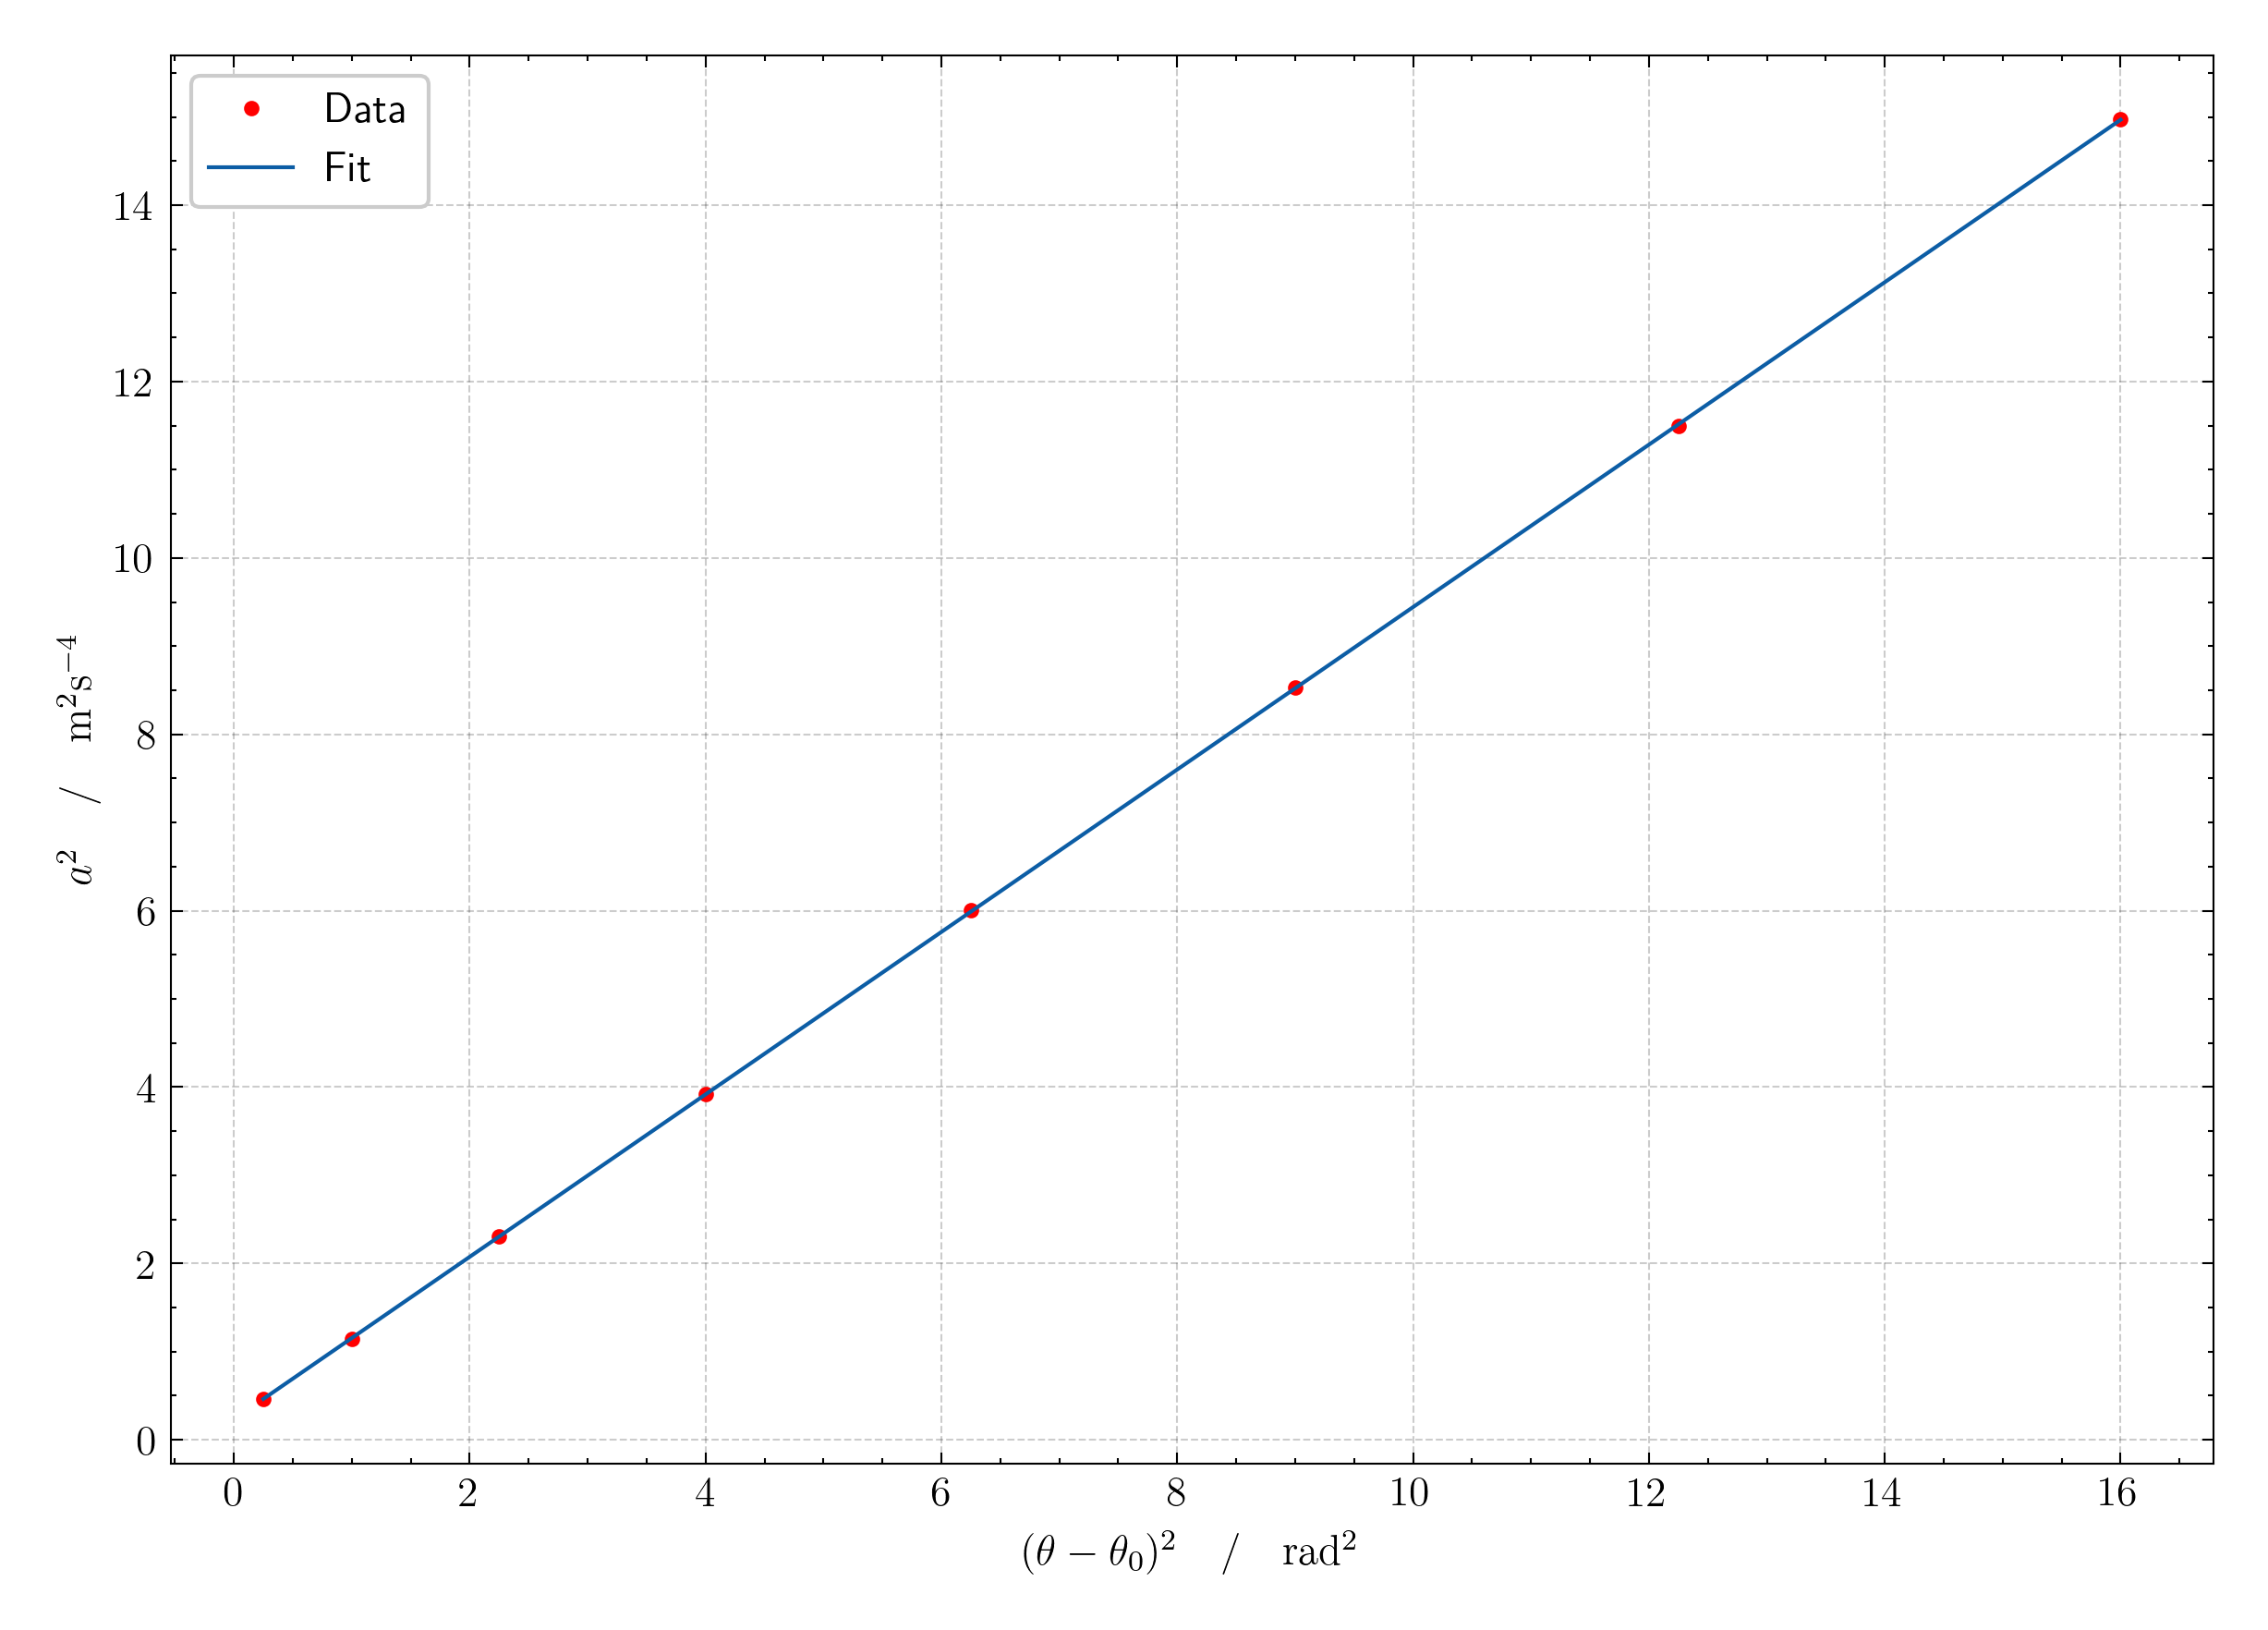

In [5]:
fig, ax = plt.subplots()
ax.set_xlabel(r"$m_2^{-1}\quad/\quad\mathrm{kg^{-1}}$")
ax.set_ylabel(r"$x\quad/\quad\mathrm{m}$")
ax.plot(1/data.m2, data.x, 'r.', label="Data")
x = np.linspace((data.theta**2).min(), (data.theta**2).max())
ax.plot(x, sum(w[i] * x**i for i in range(2)), label="Fit")
ax.legend()

In [6]:
# (b)
# Linear acceleration: a^2 = R^2 * (alpha^2 + omega^4)
# Slope: d(a^2) / d(theta^2) = R^2 * d(omega^4) / d(theta^2)
# theta^2 = 1/4 * alpha^2 * t^4, omega^4 = alpha^4 * t^4
# d(omega^4) / d(theta^2) = d(omega^4) / dt / (d(theta^2) / dt) = 4 * alpha^4 * t^3 / (alpha^2 * t^3) = 4 * alpha^2
# -> slope = 4 * R^2 * alpha^2 => alpha = sqrt(slope / 4 / R^2).
alpha = np.sqrt(w[1] / 4 / R**2)
print(f"Angular acceleration: alpha = {alpha:.3f} rad / s^2")

Angular acceleration: alpha = 0.600 rad / s^2


In [7]:
# (c)
# theta = 1/2 * alpha * t^2 => t = sqrt(2 * theta / alpha)
t = np.sqrt(2 * (135 * np.pi / 180) / alpha)
omega = alpha * t
v = omega * R
print(f"Linear speed at 135°: v = {v:.3f} m / s")

Linear speed at 135°: v = 1.345 m / s


In [8]:
# (d)
# angle = arccos(a_tan / sqrt(a_rad^2 + a_tan^2))
t = np.sqrt(2 * (np.pi / 2) / alpha)
a_rad = (alpha * t)**2 * R
a_tan = alpha * R
angle = np.arccos(a_tan / np.sqrt(a_rad**2 + a_tan**2))
print(f"Angle: {angle * 180 / np.pi:.3f}°")

Angle: 72.343°
